[2.18506353e-02 2.25233850e-02 9.07624747e-03 2.31079336e-02
 1.71861443e-01 1.33976873e-01 6.78464160e-03 3.61530044e-02
 1.29010313e-02 2.54945804e-02 1.85674500e-02 3.78074036e-03
 2.15126107e-02 6.09299844e-02 8.73369540e-03 6.61426081e-02
 6.56900983e-03 7.88871159e-02 3.38563353e-02 5.44966458e-02
 1.74375765e-01 6.96681989e-02 1.82125049e-01 4.05776740e-02
 6.55703711e-02 2.08877596e-02 8.63080719e-02 6.84776354e-03
 9.91508127e-02 1.06248470e-02 1.11390048e-02 2.32334987e-02
 7.15341138e-03 2.32383140e-02 7.53642746e-02 4.19276787e-02
 6.39401320e-02 1.04992129e-01 1.84535172e-02 5.78349785e-03
 2.68424928e-02 1.63213141e-02 2.01687925e-02 6.46963540e-02
 5.82823029e-02 2.77181661e-02 8.06121253e-02 1.25035195e-02
 9.42233546e-02 2.36617972e-02 5.15742286e-02 3.07725278e-02
 2.75315048e-02 8.09863373e-02 9.93949932e-02 1.79181287e-02
 6.37515254e-02 4.04859557e-02 2.38629244e-02 1.86113738e-02
 1.25856157e-02 2.38226637e-03 1.10085034e-02 6.06876175e-02
 6.09999492e-02 9.027634

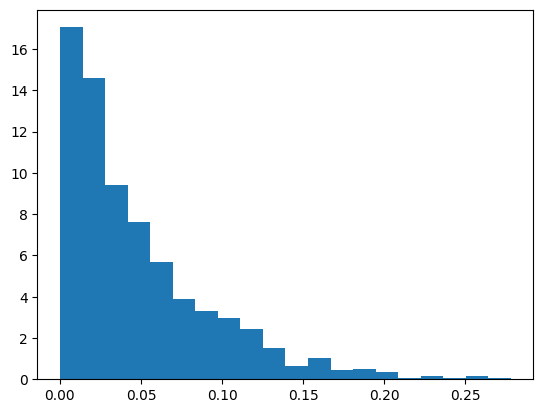

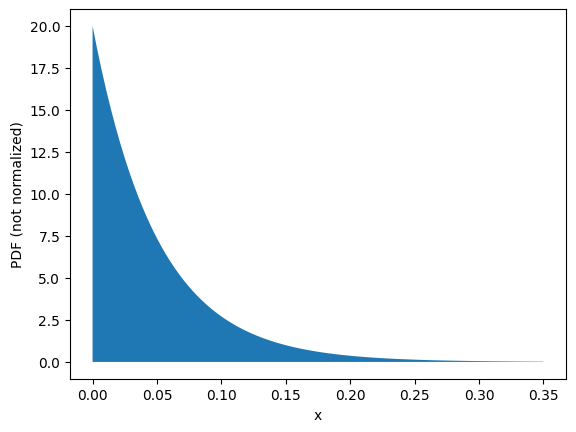

In [28]:
#5. Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.
import numpy as np
import math
l = 20 #значение лямбда
array = np.random.rand(1000)
for i in range (1000):
    array[i] = -(math.log(1-array[i]))/l
print(array)

import matplotlib.pyplot as plt
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(array, 20,  density=True)
plt.show()


%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(0, 0.35, 100)
density = l*np.exp(-x*l) # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

[-2.16214393e-01 -5.93013594e-01  5.14208720e-01  8.86826713e-01
 -1.26257342e-02  2.37746167e-01  3.93228598e-01  1.24579660e+00
  6.71598376e-01 -1.25893932e-01 -1.53036288e-01  9.33433853e-01
 -6.62904128e-01 -2.55845590e-01 -1.45581564e-02  1.05015571e+00
  1.15486675e+00  5.23833425e-01  6.30230218e-01  7.39386653e-01
  6.58696417e-01  6.30262042e-01 -8.62684564e-01 -2.57736449e-01
  1.87869986e+00  4.30760293e-01 -3.77601644e-01  2.04055276e+00
 -5.00407981e-01 -5.06494425e-01  2.70287748e-01  8.63127376e-01
  8.31889652e-01 -3.19917055e-03 -2.37681824e-02  5.95443067e-01
  1.85198091e+00 -9.21731686e-01 -2.26297704e-01 -4.65475928e-02
  7.24994965e-01 -4.00785722e-01  5.38645116e-01  1.11038485e+00
 -1.32715924e-01  7.75100943e-01  2.73438750e-01  2.71930550e-02
  5.38273315e-01  8.35659576e-01  2.29607276e-01 -7.31421309e-02
  5.03182400e-02  3.59059961e-01 -1.95654027e-02  1.78956887e+00
  6.89941877e-01  5.33637232e-01 -2.69938941e-01 -1.73827056e-01
  4.16708019e-01  5.46064

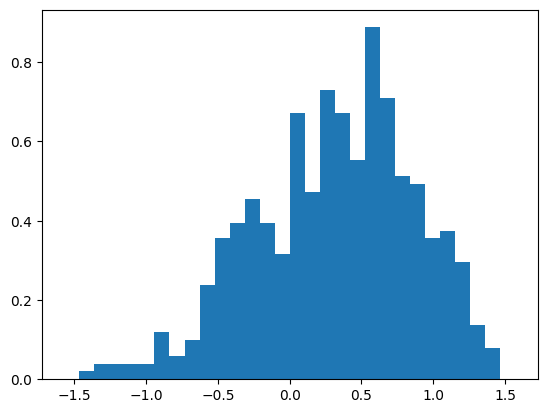

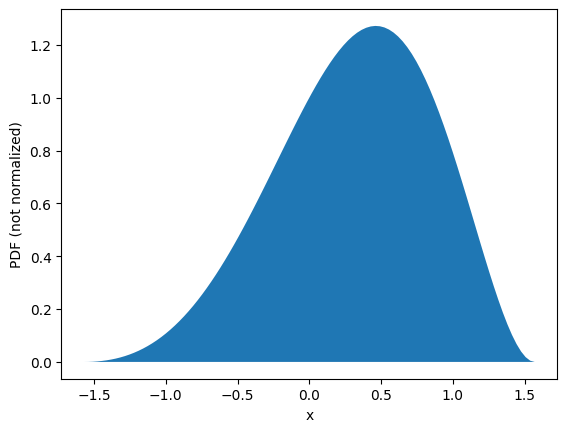

In [63]:
# 6. Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.
import numpy as np
import math
import scipy.stats as sps
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
pi = math.pi

def q(x):
    return (1/math.sqrt(2*pi))*np.exp(-x*x/2) #нормальное распределение
def p(x):
    return np.exp(x)*np.cos(x)**2 


x = np.arange(-pi/2, pi/2, 0.01)
k = max(p(x) / q(x))  #масштабирование


def sample(size):
    xs = np.random.normal(0, 1, size=size)
    cs = np.random.uniform(0, 1, size=size)
    mask = p(xs) / (k * q(xs)) > cs
    return xs[mask] 

samples = sample(1000)
print (samples)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(samples, 30, range = (-pi/2, pi/2),density=True)
plt.show()



%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

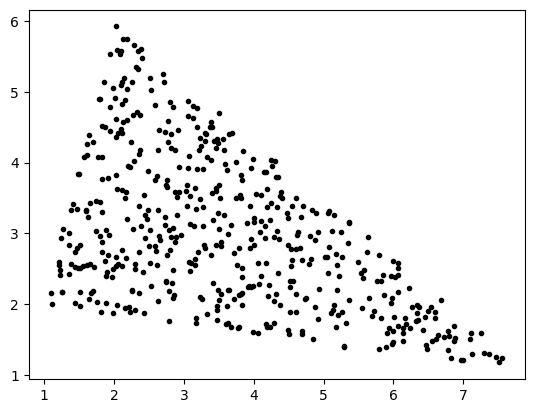

In [129]:
# 7. Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.
 

N = 1000             # Number of points
V = [[1, 2], [2, 6], [8, 1]]  # Triangle vertices, pairs of (x, y)
ArrX = []
ArrY = []
while len(ArrX) != 500:
    t = math.sqrt(np.random.uniform(0, 1))
    s = np.random.uniform(0, 1)
    P = np.multiply((1 - t), V[0]) +  np.multiply((t * (1 - s)),V[1]) + np.multiply((t * s), V[2])
    ArrX.append(P[0])
    ArrY.append(P[1])
plt.plot(ArrX, ArrY, ".k")

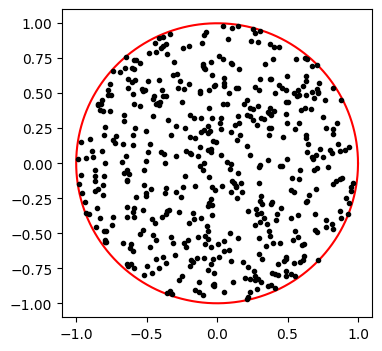

In [111]:
# 8. Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

r = 1
angels = np.linspace(0,2*np.pi,500)
cirX = r*np.cos(angels)
cirY = r*np.sin(angels)

arrX = []
arrY = []
while len(arrX) != 500:
    theta = np.random.uniform(0, 2*np.pi)
    r = math.sqrt(np.random.uniform(0, 1))
    arrX.append(r * np.cos(theta))
    arrY.append(r * np.sin(theta))
plt.figure(figsize=(4,4))
plt.plot(cirX,cirY,"r")
plt.plot(arrX, arrY, ".k")

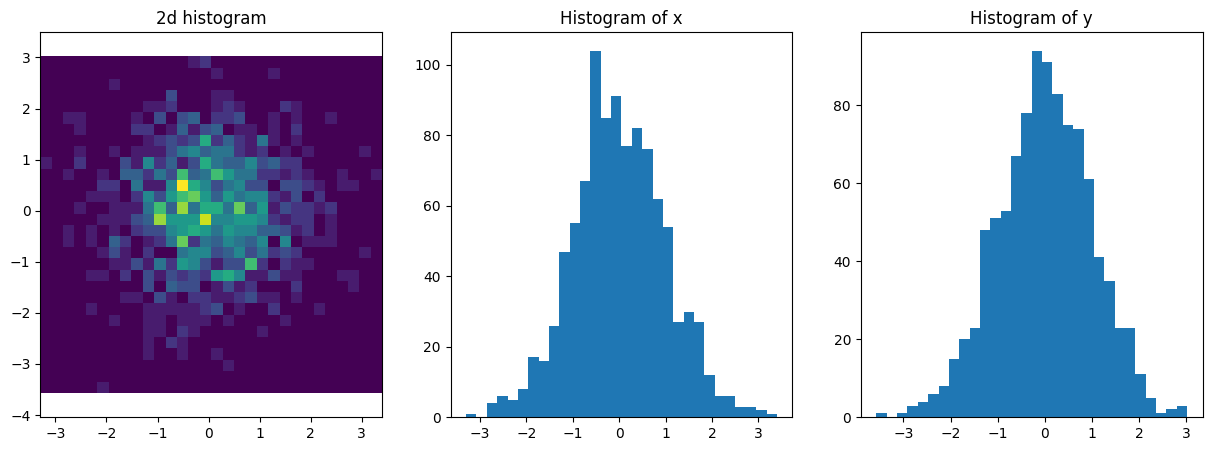

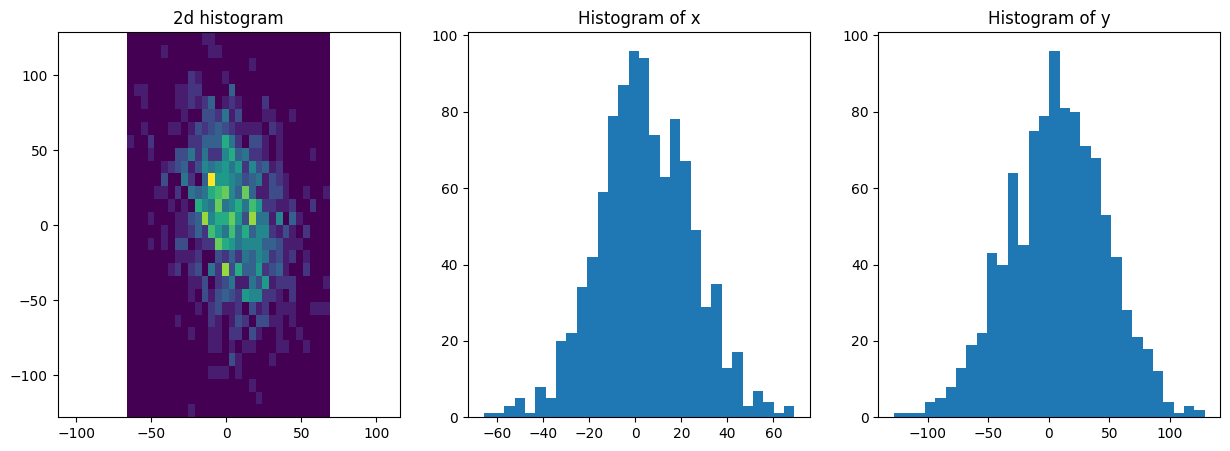

Выборочное среднее: [4.268546593229761, 7.0079621461719785]
Матрица ковариации [[ 414.20007688 -244.5439567 ]
 [-244.5439567  1627.03849247]]


In [185]:
# 9. Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. 
#Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. 
#С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. 
#Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.



%matplotlib inline




arrX = []
arrY = []
arrXX = []
arrYY = []
sum1 = 0
sum2 =0
while len(arrX) != 1000:
    s1 = np.random.uniform(-1, 1)
    s2 = np.random.uniform(-1, 1)
    s = (s1*s1+s2*s2)
    if s>0 and s<=1:
        x = s1*np.sqrt(-2*np.log(s)/s)
        y = s2*np.sqrt(-2*np.log(s)/s)
        arrX.append(x)
        arrY.append(y)
        arrXX.append(4 + 20*x - 4*y)
        sum1 = sum1 + 4 + 20*x - 4*y
        arrYY.append(7 - 4*x + 40*y)
        sum2 = sum2 + 7 - 4*x + 40*y
main = [sum1/1000,sum2/1000]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(arrX, arrY, bins=30)
ax[0].axis('equal')
ax[1].hist(arrX, bins=30)
ax[2].hist(arrY, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(arrXX, arrYY, bins=30)
ax[0].axis('equal')
ax[1].hist(arrXX, bins=30)
ax[2].hist(arrYY, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()


print("Выборочное среднее:", main)
print("Матрица ковариации", np.cov(arrXX, arrYY)) 

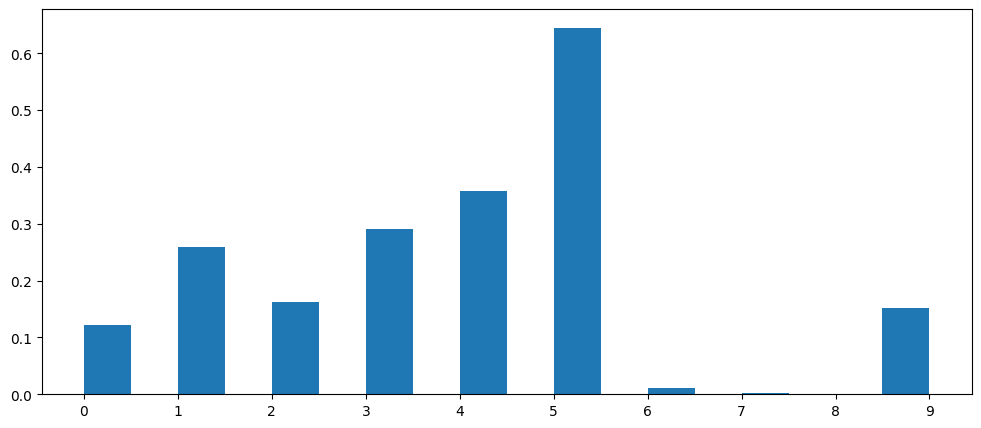

In [190]:
# 4. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.
import numpy as np
val = {0: 0.12, 1: 0.3, 2: 0.167, 3: 0.24, 4: 0.31, 5: 0.54, 6: 0.111, 7: 0.02, 8: 0.001, 9: 0.2}
values = {k: v for k, v in sorted(val.items(), key=lambda item: item[1], reverse=True)}
A = list(values.values())
B = list(values.keys())
sum_weights = sum(A)
arr_weights = []
for i in range(len(A)):
    arr_weights.append(A[i] + sum(A[:i])) # веса с суммами
answer = []
for i in range(1000):
    x = np.random.rand()*sum_weights # равномерное от 0 до суммы весов
    if (x <= arr_weights[0]): 
        answer.append(B[0])
    for j in range(1, 9):
        if (x > arr_weights[j] and x <= arr_weights[j+1]):
            answer.append(B[j])
            
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(answer, bins=18, density=True)
plt.xticks(B)
fig.set_figwidth(12) 
fig.set_figheight(5)
plt.show()